## TASK

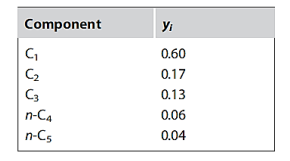

Given the following mole fractions of a gas at 300 psia and 130°F and
assuming real gas behavior, calculate:

a\. Z-Factor (Papay’s Method)

b\. Z-Factor (Hall and Yarborough Method)

c\. Compare the values of gas density based on both computed Z-factors

d\. Compare the values of gas formation volume factor based on both
computed Z-factors.

## PROBLEM DESCRIPTION

Compressibility factor values are usually obtained by calculation from equations of state (EOS), such as the virial equation which take compound-specific empirical constants as input. For a gas that is a mixture of two or more pure gases (air or natural gas, for example), the gas composition must be known before compressibility can be calculated.
Alternatively, the compressibility factor for specific gases can be read from generalized compressibility charts that plot 
Z as a function of pressure at constant temperature. In thermodynamics, the compressibility factor (Z), also known as the
compression factor or the gas deviation factor, is a correction factor
which describes the deviation of a real gas from ideal gas behaviour. It
is simply defined as the ratio of the molar volume of a gas to the molar
volume of an ideal gas at the same temperature and pressure.

Typically, thermodynamic tables or real-gas EOS are used for evaluating the relation of pressure, temperature, and specific volume of real gases. If neither tool is available, the generalized compressibility chart may be used instead as a fast and reasonably accurate tool, especially for substances with simple molecular structures. 

In general, deviation from ideal behaviour becomes more significant the closer a gas is to a phase change, the lower the temperature or the larger the pressure.

## PROBLEM STATEMENT

The application of satndard equation of state (EOS) for a real gas without taking into
account the compressibility factor under conditions of high pressures
and temperatures can lead to inaccuracies and incorrect PVT values ​​of
reservoir fluid properties. In order to obtain the correct parameters,
it is necessary to take into account the actual behavior of the gas
using the coefficient calculated in this work.

## PVT PROPERTIES TABLE

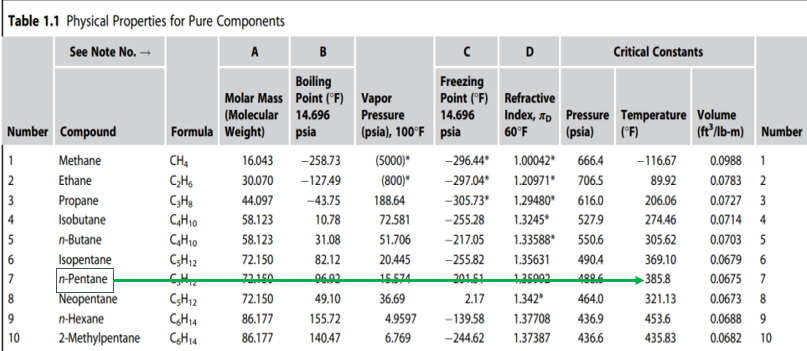

## INPUT DATA (COMPOSITION)

In [28]:
#Thermodynamic Properties

P = 300 #psia - Pressure of the input feed.
T = 590 #Rankine - Temperature of the input feed ()


#Feed Composition

C1 = 0.6 # Methane
C2 = 0.17 # Ethane
C3 = 0.13 # Propane
C4 = 0.06 # n-Butane
C5 = 0.04 # n-Pentane

#Critical Properties

P1c = 667.4 #psia
P2c = 706.5 #psia
P3c = 616.0 #psia
P4c = 550.6 #psia
P5c = 488.6 #psia

T1c = 343.33 #Rankine - C
T2c = 549.92 #Rankine - T (°F) + 460
T3c = 666.06 #Rankine - T (°F) + 460
T4c = 765.62 #Rankine - T (°F) + 460
T5c = 845.8 #Rankine - T (°F) + 460

#Molecular Weight of Each Component

MW1 = 16.0
MW2 = 30.1
MW3 = 44.1
MW4 = 58.1
MW5 = 72.2

## CALCULATIONS

### QUESTION (A) - PAPAY'S METHOD

In [29]:
Ppc = C1*P1c + C2*P2c + C3*P3c + C4*P4c + C5*P5c
Ppr = P/Ppc

In [30]:
Tpc = C1*T1c + C2*T2c + C3*T3c + C4*T4c + C5*T5c
Tpr = T/Tpc

In [31]:
Zp = 1 - (3.53 * Ppr)/(10**(0.9813 * Tpr)) + (0.274 * Ppr**2)/(10**(0.8157 * Tpr))
print(Zp)

0.9126713151056624


### QUESTION (B) - HALL AND YARBOROUGH METHOD

In [32]:
import math

In [33]:
t = Tpc/T

In [34]:
X1 = -0.06125 * Ppr * t * math.exp(-1.2 * (1 - t)**2)
X2 = (14.76 * t - 9.76 * t**2 + 4.58 * t**3)
X3 = (90.7 * t - 242.2 * t**2 + 42.4 * t**3)
X4 = (2.18 + 2.82 * t)

First Iteration

In [35]:
Y1 = 0.0125 * Ppr * t * math.exp(-1.2 * (1 - t)**2)

In [36]:
F1 = X1 + (Y1 + Y1**2 + Y1**3 + Y1**4)/((1 - Y1)**3) - X2 * Y1**2 + X3 * Y1**(X4)

Second Iteration

In [37]:
Fd1 = (1 + 4 * Y1 + 4 * Y1**2 - 4 * Y1**3 + Y1**4)/((1 - Y1)**4) - 2 * X2 * Y1 + X3 * X4 * Y1**(X4 - 1)

In [38]:
Y2 = Y1 - F1/Fd1

Third Iteration

In [39]:
F2 = X1 + (Y2 + Y2**2 + Y2**3 + Y2**4)/((1 - Y2)**3) - X2 * Y2**2 + X3 * Y2**(X4)

In [40]:
Fd2 = (1 + 4 * Y2 + 4 * Y2**2 - 4 * Y2**3 + Y2**4)/((1 - Y2)**4) - 2 * X2 * Y2 + X3 * X4 * Y2**(X4 - 1)

In [41]:
Y3 = Y2 - F2/Fd2

Fourth Iteration

In [42]:
F3 = X1 + (Y3 + Y3**2 + Y3**3 + Y3**4)/((1 - Y3)**3) - X2 * Y3**2 + X3 * Y3**(X4)

In [43]:
Fd3 = (1 + 4 * Y3 + 4 * Y3**2 - 4 * Y3**3 + Y3**4)/((1 - Y3)**4) - 2 * X2 * Y3 + X3 * X4 * Y3**(X4 - 1)

In [44]:
Y4 = Y3 - F3/Fd3

Fifth Iteration

In [45]:
F4 = X1 + (Y4 + Y4**2 + Y4**3 + Y4**4)/((1 - Y4)**3) - X2 * Y4**2 + X3 * Y4**(X4)

In [46]:
Fd4 = (1 + 4 * Y4 + 4 * Y4**2 - 4 * Y4**3 + Y4**4)/((1 - Y4)**4) - 2 * X2 * Y4 + X3 * X4 * Y4**(X4 - 1)

In [47]:
Y5 = Y4 - F4/Fd4

Sixth Iteration

In [48]:
F5 = X1 + (Y5 + Y5**2 + Y5**3 + Y5**4)/((1 - Y5)**3) - X2 * Y5**2 + X3 * Y5**(X4)

In [49]:
Fd5 = (1 + 4 * Y5 + 4 * Y5**2 - 4 * Y5**3 + Y5**4)/((1 - Y5)**4) - 2 * X2 * Y5 + X3 * X4 * Y5**(X4 - 1)

In [50]:
Y6 = Y5 - F5/Fd5

In [51]:
Zh = ((0.06125 * t * Ppr)/(Y6)) * math.exp(-1.2 * (1 - t)**2)
print(Zh)

0.9176004960021472


### QUESTION (C) - COMPARE THE VALUES OF GAS DENSITY BASED ON BOTH COMPUTED Z-FACTORS

In [56]:
MW = MW1*C1 + MW2*C2 + MW3*C3 + MW4*C4 + MW5*C5
Den_p = (P * MW)/(Zp * T * 10.731)
Den_h = (P * MW)/(Zh * T * 10.731)

if Den_p < Den_h:
  print("Density calculated using the Hall and Yarborough Method based on z-factor is greater than that calculated using the Papay's method.")
  print("Hall and Yarborough's Density is " + str(Den_h))
  print("Papay's Density is " + str(Den_p))
else:
  print("Density calculated using the Papay's Method based on z-factor is greater than that calculated using the Hall and Yarborough method.")
  print("Density from Papay's Method is " + str(Den_p)[:6])
  print("Density from Hall and Yarborough's Method is " + str(Den_h)[:6])


Density calculated using the Papay's Method is greater than that calculated using the Hall and Yarborough method.
Density from Papay's Method is 1.3926
Density from Hall and Yarborough's Method is 1.3851


## QUESTION (D) - COMPARE THE VALUES OF GAS FORMATION VOLUME FACTOR (Bg) BASED ON BOTH COMPUTED Z-FACTORS

In [57]:
Bg_p = 0.02827 * Zp * T / P
Bg_h = 0.02827 * Zh * T / P

if Bg_p < Bg_h:
  print("Gas Formation Volume Factor (Bg) calculated using the Hall and Yarborough Method based on z-factor is greater than that calculated using the Papay's method")
  print("Gas Formation Volume Factor (Bg) from the Papay's Method  is " + str(Bg_p)[:6])
  print("Gas Formation Volume Factor (Bg) from the Hall and Yarborough's Method  is " + str(Bg_h)[:6])
else:
  print("Gas Formation Volume Factor (Bg) calculated using the Papay's Method based on z-factor is greater than that calculated using the Hall and Yarborough method")
  print("Papay's Formation volume factor is " + str(Bg_p)[:6])
  print("Gas Formation Volume Factor (Bg) from the Hall and Yarborough's Method  is " + str(Bg_h)[:6])


Gas Formation Volume Factor (Bg) calculated using the Hall and Yarborough Method based on z-factor is greater than that calculated using the Papay's method
Gas Formation Volume Factor (Bg) from the Papay's Method  is 0.0507
Gas Formation Volume Factor (Bg) from the Hall and Yarborough's Method  is 0.0510
